In [217]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import confusion_matrix, classification_report, homogeneity_score

In [218]:
df = pd.read_csv('data/x_train_gr_smpl.csv')
labels = pd.read_csv('data/y_train_smpl.csv')
labels = np.reshape(labels.values, newshape=(1, -1))

In [253]:
X_train = []
for i in range(df.shape[0]):
    img = np.uint8(df.iloc[i])
    edited = cv2.Canny(img, 10, 30)
    edited = cv2.GaussianBlur(edited, (5, 5), 0)
    X_train.append(edited.reshape((1,-1))[0])
    
#data = pd.DataFrame(X_train)
estimator = KMeans(n_clusters=10, max_iter=50000, random_state=1).fit(X_train)
print(homogeneity_score(labels[0], estimator.labels_))

0.4941480704250148


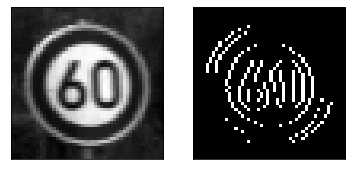

In [247]:
i = 200
img = np.uint8(df.iloc[i])
edited = cv2.GaussianBlur(img, (3, 3), 0)
edited = cv2.Canny(edited, 10, 100)

img = img.reshape((48, 48))
edited = edited.reshape((48, 48))

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(edited, 'gray')
plt.xticks([]), plt.yticks([])

plt.show()